## Flights (Exploratory Data analysis)

<a href= 'https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction'>Data Set Link</a>

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_excel('flights_data/Data_Train.xlsx')
df_train.shape

(10683, 11)

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test = pd.read_excel('flights_data/Test_set.xlsx')
df_test.shape

(2671, 10)

In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(13354, 11)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [9]:
# df[df.duplicated]

In [10]:
df['Date'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[0])
df['Month'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[1])
df['Year'] = df['Date_of_Journey'].apply(lambda x: x.split('/')[2])

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
df['Year'].value_counts()

2019    13354
Name: Year, dtype: int64

In [13]:
df[['Date', 'Year', 'Month']]=df[['Date', 'Year', 'Month']].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [15]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [17]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [19]:
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x : x.split(':')[0])
df['Arrival_Minute'] = df['Arrival_Time'].apply(lambda x : x.split(':')[1])

In [20]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [21]:
df.drop('Arrival_Time', axis=1, inplace=True)

In [22]:
df[['Arrival_Hour','Arrival_Minute']] = df[['Arrival_Hour','Arrival_Minute']].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int64  
 10  Month            13354 non-null  int64  
 11  Year             13354 non-null  int64  
 12  Arrival_Hour     13354 non-null  int64  
 13  Arrival_Minute   13354 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 1.4+ MB


In [24]:
df['Dep_Hour'] = df['Dep_Time'].apply(lambda x : x.split(':')[0])
df['Dep_Minute'] = df['Dep_Time'].apply(lambda x : x.split(':')[1])

In [25]:
df[['Dep_Hour','Dep_Minute']] = df[['Dep_Hour','Dep_Minute']].astype(int)

In [26]:
df.drop('Dep_Time', axis=1 , inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_Hour     13354 non-null  int64  
 12  Arrival_Minute   13354 non-null  int64  
 13  Dep_Hour         13354 non-null  int64  
 14  Dep_Minute       13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.5+ MB


In [28]:
df[df['Route'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [29]:
df['Total_Stops'].value_counts()
# df['Total_Stops'].unique()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [30]:
df['Total_Stops'] = df['Total_Stops'].map({
                            'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, np.nan:2})

In [31]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [32]:
df.drop('Route', axis=1 , inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13354 non-null  int64  
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int64  
 8   Month            13354 non-null  int64  
 9   Year             13354 non-null  int64  
 10  Arrival_Hour     13354 non-null  int64  
 11  Arrival_Minute   13354 non-null  int64  
 12  Dep_Hour         13354 non-null  int64  
 13  Dep_Minute       13354 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.4+ MB


In [34]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [35]:
df['duration_hour']= df['Duration'].str.split(' ').str[0].str.split('h').str[0]


In [36]:
df[df['duration_hour']=='5m']


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2,No info,NaN,12,3,2019,16,55,16,50,5m


In [37]:
df.drop(6474,axis=0,inplace=True)
df.drop(13343,axis=0,inplace=True)

In [38]:
df['duration_hour']=df['duration_hour'].astype('int')

In [39]:
df.drop('Duration',axis=1,inplace=True)


In [40]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,duration_hour
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7


In [45]:
ndf = df[df['Price'].isnull()].index

In [46]:
ndf

Int64Index([10683, 10684, 10685, 10686, 10687, 10688, 10689, 10690, 10691,
            10692,
            ...
            13344, 13345, 13346, 13347, 13348, 13349, 13350, 13351, 13352,
            13353],
           dtype='int64', length=2670)

In [47]:
df.drop(ndf, inplace =True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Total_Stops      10682 non-null  int64  
 4   Additional_Info  10682 non-null  object 
 5   Price            10682 non-null  float64
 6   Date             10682 non-null  int64  
 7   Month            10682 non-null  int64  
 8   Year             10682 non-null  int64  
 9   Arrival_Hour     10682 non-null  int64  
 10  Arrival_Minute   10682 non-null  int64  
 11  Dep_Hour         10682 non-null  int64  
 12  Dep_Minute       10682 non-null  int64  
 13  duration_hour    10682 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.2+ MB


In [49]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,duration_hour
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4


In [50]:
df['Year'].unique()

array([2019])

In [51]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,duration_hour
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9086.292735,13.509081,4.708762,2019.0,13.348530,24.687793,12.490358,24.408819,10.247051
std,0.675229,4610.885695,8.479363,1.164294,0.0,6.859398,16.504203,5.748819,18.767225,8.495234
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000


In [54]:
Airline = df.groupby('Airline')['Price'].sum()
Airline

Airline
Air Asia                              1783293.0
Air India                            16821514.0
GoAir                                 1137045.0
IndiGo                               11648071.0
Jet Airways                          44817461.0
Jet Airways Business                   350152.0
Multiple carriers                    13039603.0
Multiple carriers Premium economy      148445.0
SpiceJet                              3548717.0
Trujet                                   4140.0
Vistara                               3734451.0
Vistara Premium economy                 26887.0
Name: Price, dtype: float64

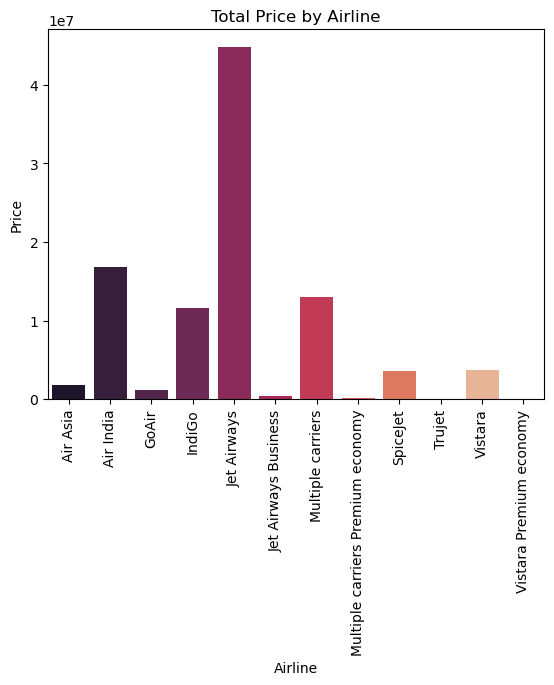

In [56]:
sns.barplot(x=Airline.index , y= Airline , palette='rocket')
plt.title('Total Price by Airline')
plt.xticks(rotation =90)
plt.show()

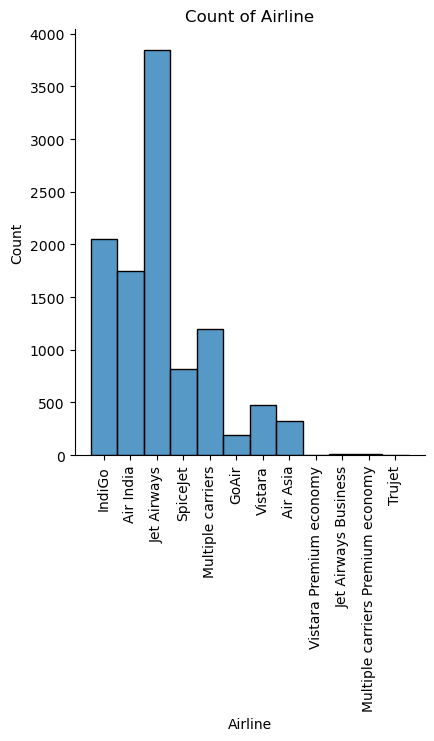

In [58]:
sns.displot(df['Airline'])
plt.title('Count of Airline')
plt.xticks(rotation =90)
plt.show()

In [62]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,duration_hour
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7


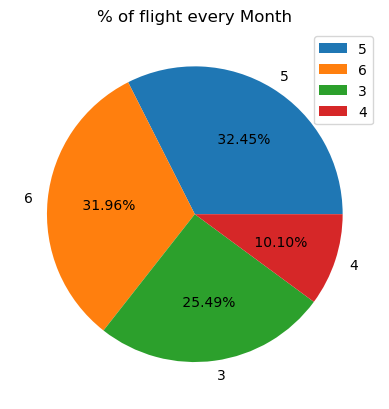

In [116]:
# df.Month.unique()
month = df.value_counts('Month')
plt.pie(month, labels=month.index, autopct='% .2f%%')
plt.legend()
plt.title('% of flight every Month')
plt.show()

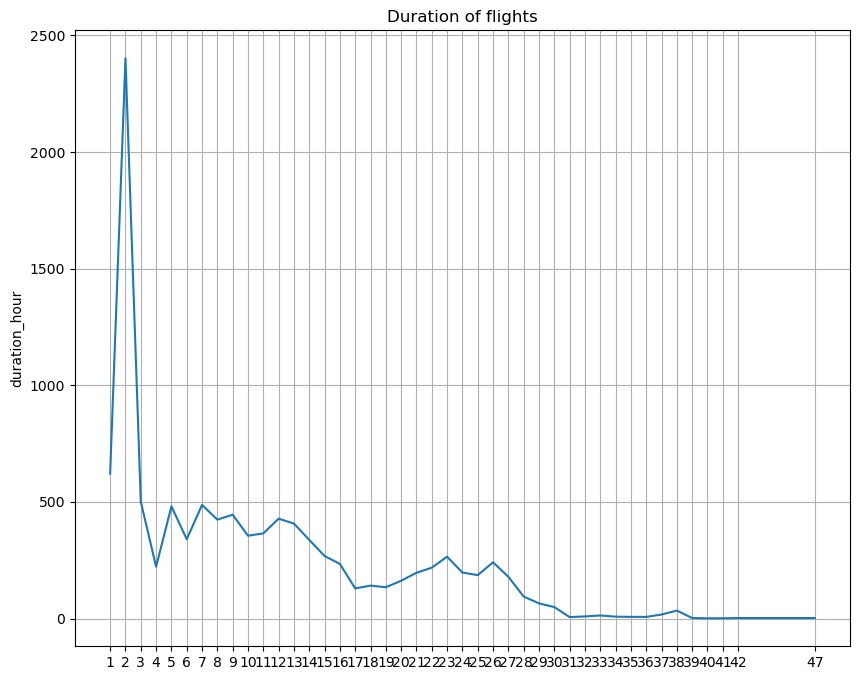

In [76]:
hour= [h for h, i in df.groupby('duration_hour')]
hour_count = df.groupby(['duration_hour'])['duration_hour'].count()
plt.figure(figsize=(10,8))
sns.lineplot(x=hour , y= hour_count )
plt.grid()
plt.xticks(hour)
plt.title('Duration of flights')
plt.show()

In [88]:
# df[df['duration_hour'] >30]
flight_counts = df.groupby(['Source', 'Destination']).size().reset_index(name='count')
flight_counts


,Source,Destination,count
0,Banglore,Delhi,1265
1,Banglore,New Delhi,932
2,Chennai,Kolkata,381
3,Delhi,Cochin,4537
4,Kolkata,Banglore,2871
5,Mumbai,Hyderabad,696


/tmp/ipykernel_3582/3314931213.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flight_counts.pivot('Source', 'Destination', 'count'),


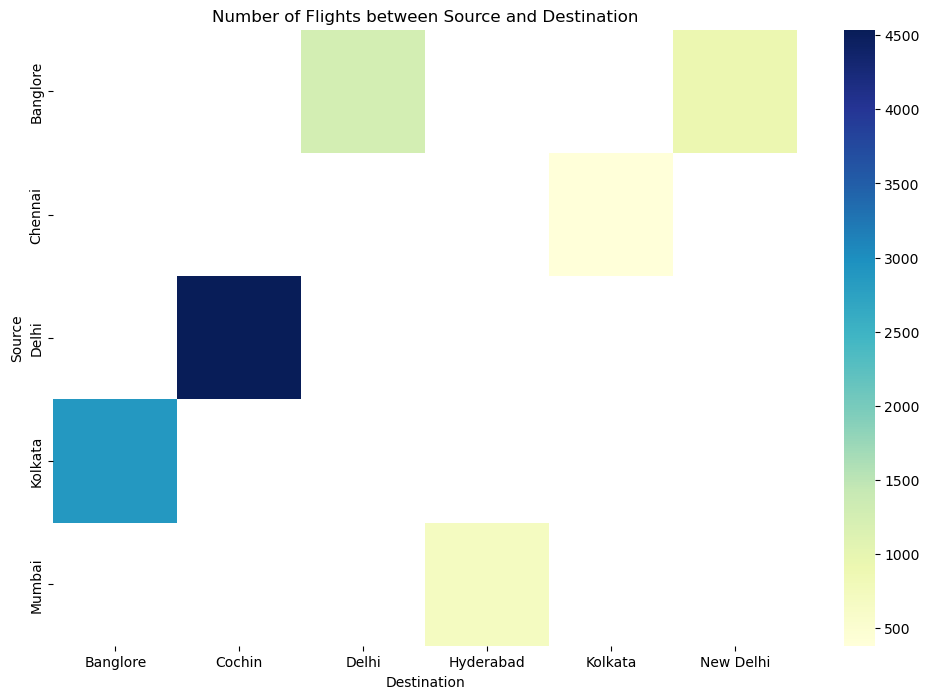

In [87]:

# Create a Seaborn heatmap to visualize the flight counts
plt.figure(figsize=(12, 8))
sns.heatmap(
    flight_counts.pivot('Source', 'Destination', 'count'),
    cmap='YlGnBu',
    cbar=True,  # Show a colorbar
)
plt.title('Number of Flights between Source and Destination')
plt.xlabel('Destination')
plt.ylabel('Source')
plt.show()

In [111]:
stops= df["Total_Stops"].value_counts()

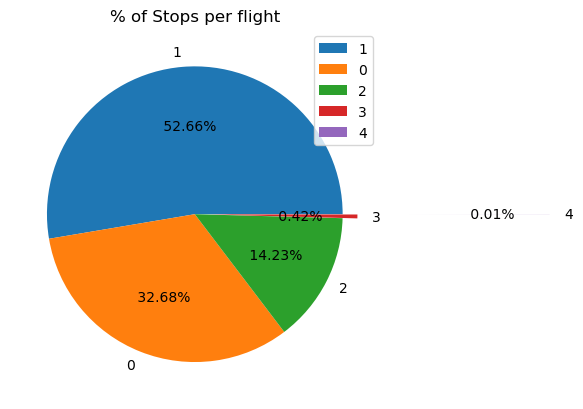

In [117]:
plt.pie(stops, labels=stops.index, autopct='% .2f%%', explode =(0, 0, 0, 0.1,1.4))
plt.legend()
plt.title('% of Stops per flight')

plt.show()